<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Project-Summary" data-toc-modified-id="Project-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Summary</a></span></li><li><span><a href="#Project-Setup" data-toc-modified-id="Project-Setup-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Project Setup</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Retrieval" data-toc-modified-id="Data-Retrieval-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Retrieval</a></span></li><li><span><a href="#Exploring-Drivers-Dataset" data-toc-modified-id="Exploring-Drivers-Dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring Drivers Dataset</a></span></li></ul></li></ul></div>

In [10]:
%load_ext autoreload
%autoreload 2

In [15]:
# Imports

from kiwi_ridesharing.data import Kiwi
from kiwi_ridesharing.drivers import Driver
from kiwi_ridesharing.ride import Ride

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import chart_studio.plotly as py

pd.set_option('display.max_columns', None)

In [16]:
# set tick and lable sizes for all plt plots

SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Introduction

This notebook is part of a data analysis assignment given to me as part my interview process at Phiture. This notebook will document all the steps I took to prepare, clean, analyze and visualize the data.

## Project Summary

The goal of this assignment is to analyze data from a fictional ridesharing startup called Kiwi, which is based in New Zealand. Kiwi would like to grow in the competitive market and want us to help them answer important business questions and provide recommendations that could help them make appropriate business decisions.

## Project Setup

Kiwi gave us access to their data warehouse, which contains three tables:

- ride_ids
- driver_ids
- ride_timestamps

These CSV files were converted into a SQLite database using the [csvs-to-sqlite](https://pypi.org/project/csvs-to-sqlite/) package.

The basic project repository structure is shown below. 

- The data directory contains the created SQLite database as well as the raw CSV files. 
- The kiwi_ridesharing directory contains Python modules with Classes that handle the logic of data preperation for our project. Check the README.md file for more information on what each module does.
- The notebooks directory contains all the notebooks made for experimentation and data visulaization

# EDA

In this section i wills tart exploring the data and visualizing it in order to get a better understanding of it's distributions and trends.


## Data Retrieval

First, i will use the Classes that i wrote to retrieve the prepared and joined data.

In [25]:
# get complete driver and rider data as well as the original CSV files
original_data = Kiwi().get_data()
drivers = Driver().get_driver_training_data()
rides = Ride().get_full_rides_data()

## Exploring Drivers Dataset

This data set was created using the Driver class and contains different information regarding each driver id such as:

- **'driver_onboard_date'** -> Date of driver on-boarding
- **'first_ride'** --> Timestamp of first complete ride
- **'last_ride'** --> Timestamp of last completed ride
- **'is_churn'** --> 1 indicating that the driver has churned
- **'lifetime'** --> Number of days between on-boarding and churn date 
- **'days_since_last_ride'**--> 
- **'timestamp'** --> Timestamp of max consecutive days without ride
- **'last_online'** --> Number of days since last ride - relative to the maximum time period included in the dataset
- **'ride_count'** --> Total number of completed rides
- **'total_distance'** --> Total distance traveled
- **'total_driving_time'** --> Total driving time 
- **'total_earned'** --> Total earned
- **'prime_time_rides'**--> Number of completed primetime rides
- **'average_speed'**--> Average driving speed
- **'average_waittime'** --> Average time driver waited for rider in seconds
- **'average_response_time'** --> Average time for driver to confirm booking in seconds
- **'rides_weekday'** --> Number of rides on weekdays
- **'rides_weekend'** --> number of rides on weekends
- **'lifetime_in_days'** --> Number of days between on-boarding and churn date
- **'kiwi_average_monthly_revenue'** --> Average monthly revenue generated by driver for Kiwi
- **'average_lifetime_value'** --> Driver average lifetime value (ALTV)

In [26]:
drivers.head()

,driver_id,driver_onboard_date,first_ride,last_ride,is_churn,max_consecutive_offline,last_online,ride_count,total_distance,total_driving_time,total_earned,prime_time_rides,average_speed,average_waittime,average_response_time,rides_weekday,rides_weekend,lifetime_in_days,kiwi_average_monthly_revenue,average_lifetime_value
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-03-29 18:55:47,2016-06-23 10:29:53,0,8.0,3.0,277,1740.29,61.43,2923.29,110.0,24.111913,5.516245,8.407942,214.0,63.0,90.0,182.717500,548.152500
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-03-29 22:48:33,2016-06-22 13:28:38,0,16.0,4.0,31,117.53,5.65,265.30,12.0,20.516129,4.967742,11.838710,22.0,9.0,90.0,16.587500,49.762500
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-04-05 11:11:36,2016-06-12 20:30:38,1,17.0,14.0,34,269.65,8.13,395.70,16.0,25.323529,4.147059,7.294118,18.0,16.0,68.0,32.983333,74.762222
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-04-25 16:21:24,2016-06-26 10:36:13,0,12.0,0.0,191,1471.24,48.50,2118.02,48.0,27.858639,10.952880,14.198953,152.0,39.0,65.0,176.513333,382.445556
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-04-29 08:14:54,2016-06-24 13:27:38,0,4.0,2.0,375,3123.64,99.28,4370.78,99.0,27.021333,8.256000,12.528000,375.0,0.0,59.0,364.230000,716.319000


In [27]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   driver_id                     937 non-null    object        
 1   driver_onboard_date           937 non-null    datetime64[ns]
 2   first_ride                    837 non-null    datetime64[ns]
 3   last_ride                     837 non-null    datetime64[ns]
 4   is_churn                      937 non-null    int64         
 5   max_consecutive_offline       837 non-null    float64       
 6   last_online                   837 non-null    float64       
 7   ride_count                    937 non-null    int64         
 8   total_distance                937 non-null    float64       
 9   total_driving_time            937 non-null    float64       
 10  total_earned                  937 non-null    float64       
 11  prime_time_rides              93

In [31]:
drivers.describe(include='all', datetime_is_numeric=True)

,driver_id,driver_onboard_date,first_ride,last_ride,is_churn,max_consecutive_offline,last_online,ride_count,total_distance,total_driving_time,total_earned,prime_time_rides,average_speed,average_waittime,average_response_time,rides_weekday,rides_weekend,lifetime_in_days,kiwi_average_monthly_revenue,average_lifetime_value
count,937,937,837,837,937.000000,837.000000,837.000000,937.000000,937.000000,937.000000,937.000000,937.000000,854.000000,837.000000,837.000000,937.000000,937.000000,937.000000,837.000000,837.000000
unique,937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,002be0ffdc997bd5c50703158b7c2491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016-04-19 07:57:57.054428928,2016-04-19 19:51:20.876941568,2016-06-13 17:58:11.185185024,0.274280,11.011947,12.927121,198.389541,1376.144589,47.364749,2195.749178,70.092850,26.232983,5.733109,11.910942,139.576307,57.018143,58.116329,228.824680,478.524687
min,NaN,2016-03-28 00:00:00,2016-03-28 06:37:51,2016-03-30 17:45:36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.333333,1.482759,5.044444,0.000000,0.000000,1.000000,3.665000,1.727000
25%,NaN,2016-04-07 00:00:00,2016-04-06 22:08:46,2016-06-06 19:56:28,0.000000,5.000000,0.000000,39.000000,266.190000,9.170000,421.830000,10.000000,22.444629,2.541667,9.523810,26.000000,7.000000,46.000000,60.490000,78.284333
50%,NaN,2016-04-19 00:00:00,2016-04-19 09:28:16,2016-06-24 11:14:57,0.000000,8.000000,2.000000,200.000000,1214.880000,45.830000,2118.020000,56.000000,25.340784,4.256637,11.064516,125.000000,32.000000,61.000000,210.680000,470.325000
75%,NaN,2016-05-01 00:00:00,2016-05-01 01:56:58,2016-06-26 10:57:45,1.000000,14.000000,20.000000,316.000000,2170.760000,75.000000,3486.220000,112.000000,28.629293,7.942408,13.292419,230.000000,90.000000,75.000000,332.376667,726.390500
max,NaN,2016-05-15 00:00:00,2016-05-19 18:03:02,2016-06-27 00:50:50,1.000000,77.000000,88.000000,919.000000,6628.200000,216.570000,10108.260000,384.000000,49.675676,29.517241,41.250000,614.000000,373.000000,91.000000,1105.065000,2330.501667


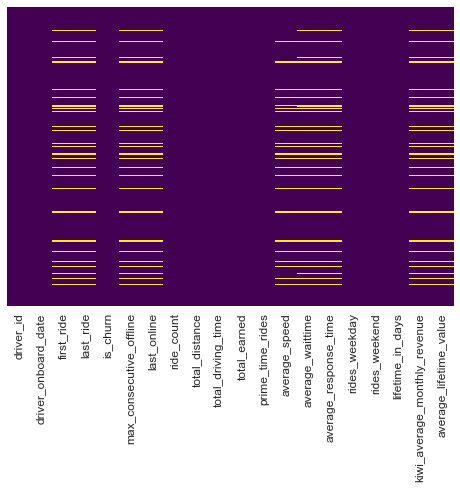

In [32]:
# check for numissing values
sns.heatmap(drivers.isnull(),
        yticklabels=False,
        cbar=False,
        cmap='viridis')
plt.show()

In [37]:
# drivers with onboarding records and ride records but no ride_timestamp records
drivers[(drivers["first_ride"].isnull()) & (drivers["ride_count"] != 0)]

,driver_id,driver_onboard_date,first_ride,last_ride,is_churn,max_consecutive_offline,last_online,ride_count,total_distance,total_driving_time,total_earned,prime_time_rides,average_speed,average_waittime,average_response_time,rides_weekday,rides_weekend,lifetime_in_days,kiwi_average_monthly_revenue,average_lifetime_value
61,136b51093f684e15e2798e4dc1e23d0c,2016-05-14,NaT,NaT,0,NaN,NaN,137,1206.03,35.08,1736.50,56.0,29.145985,NaN,NaN,0.0,0.0,44.0,NaN,NaN
73,1696be121baad60c7ca8a1c8164b24ad,2016-04-22,NaT,NaT,0,NaN,NaN,60,269.40,13.85,566.60,20.0,19.033333,NaN,NaN,0.0,0.0,66.0,NaN,NaN
100,1cf6fa07dcec364af2acf257b2d3731e,2016-05-13,NaT,NaT,0,NaN,NaN,102,611.26,19.92,973.88,27.0,27.617647,NaN,NaN,0.0,0.0,45.0,NaN,NaN
122,23d3a2d0f6732d106fbc3d6079ac018d,2016-04-19,NaT,NaT,0,NaN,NaN,75,347.95,16.32,758.68,42.0,20.200000,NaN,NaN,0.0,0.0,69.0,NaN,NaN
157,2c00d6d77281fb9f97c1eb711f39b08d,2016-05-02,NaT,NaT,0,NaN,NaN,83,347.62,18.75,771.94,33.0,19.132530,NaN,NaN,0.0,0.0,56.0,NaN,NaN
281,4bbf15c7280e29c1df6edd7bf6dfa56a,2016-05-04,NaT,NaT,0,NaN,NaN,60,351.40,13.40,624.60,24.0,21.933333,NaN,NaN,0.0,0.0,54.0,NaN,NaN
300,4fc9091d4e900a41a207ee32a639d658,2016-04-19,NaT,NaT,0,NaN,NaN,107,585.17,23.98,1015.61,33.0,22.112150,NaN,NaN,0.0,0.0,69.0,NaN,NaN
311,53b03eb76e7c0e268c027a6868b9394c,2016-04-15,NaT,NaT,0,NaN,NaN,147,779.03,27.63,1347.90,48.0,26.040816,NaN,NaN,0.0,0.0,73.0,NaN,NaN
463,794a74f41f18a115252fd26bbd16882b,2016-03-31,NaT,NaT,0,NaN,NaN,150,732.33,37.70,1531.01,59.0,18.680000,NaN,NaN,0.0,0.0,88.0,NaN,NaN
497,818ce9e1cee09531cb20bdffe3f41256,2016-04-22,NaT,NaT,0,NaN,NaN,126,684.51,27.78,1196.52,43.0,23.134921,NaN,NaN,0.0,0.0,66.0,NaN,NaN


In [38]:
# drivers with onboarding records and neither ride records nor ride_timestamp records
drivers_only_onboarding = drivers[(drivers["first_ride"].isnull()) & (drivers["ride_count"] == 0)]

,driver_id,driver_onboard_date,first_ride,last_ride,is_churn,max_consecutive_offline,last_online,ride_count,total_distance,total_driving_time,total_earned,prime_time_rides,average_speed,average_waittime,average_response_time,rides_weekday,rides_weekend,lifetime_in_days,kiwi_average_monthly_revenue,average_lifetime_value
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,52.0,NaN,NaN
59,133faf644d5cfee9460b87eea4367f92,2016-04-08,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,80.0,NaN,NaN
62,13fe6713788e9b63f57950320f260512,2016-05-05,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,53.0,NaN,NaN
64,146cd888491dd0f348575244f5bbc24e,2016-04-16,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,72.0,NaN,NaN
67,1585fa96f0818e8f4d1cf826b332fda4,2016-05-06,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,52.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,f24c7a1f58df6b9e7ee7f01012e601ac,2016-04-26,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,62.0,NaN,NaN
899,f429fcd3fe77e166454f9b27813b07d1,2016-04-13,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,75.0,NaN,NaN
910,f9893308ea5859d7ede4e034086c461c,2016-04-06,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,82.0,NaN,NaN
920,fc857228f75499b2f24b3d547e12b9e9,2016-05-09,NaT,NaT,0,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,49.0,NaN,NaN


There are 8 columns in total which contain missing values. These missing values are due to the fact that not all on-boarded drivers have corresponding records in the ride_timetables dataset, which contains information on each ride a driver did. In this case I decided to keep these rows since on-boarded driver don't have to have completed any rides. 

- You should remove drivers that only have on-bording dates and nothing else